<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


* Extract information from a given web site 
* Write the scraped data into a csv file.


## Extract information from the given web site
You will extract the data from the below web site: <br> 


In [1]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [2]:
# Your code here

from bs4 import BeautifulSoup
import requests

Download the webpage at the url


In [3]:
#your code goes here
data=requests.get(url).text

Create a soup object


In [4]:
#your code goes here

soup = BeautifulSoup(data, 'html.parser')

Scrape the `Language name` and `annual average salary`.


In [5]:
import requests
from bs4 import BeautifulSoup

table = soup.find('table')

# Extract 2nd and 4th columns
for row in table.find_all('tr'):
    cells = row.find_all(['td', 'th'])
    if len(cells) >= 4:
        print(cells[1].text.strip(), "|", cells[3].text.strip())

Language | Average Annual Salary
Python | $114,383
Java | $101,013
R | $92,037
Javascript | $110,981
Swift | $130,801
C++ | $113,865
C# | $88,726
PHP | $84,727
SQL | $84,793
Go | $94,082


Language | Average Annual Salary
Python | $114,383
Java | $101,013
R | $92,037
Javascript | $110,981
Swift | $130,801
C++ | $113,865
C# | $88,726
PHP | $84,727
SQL | $84,793
Go | $94,082


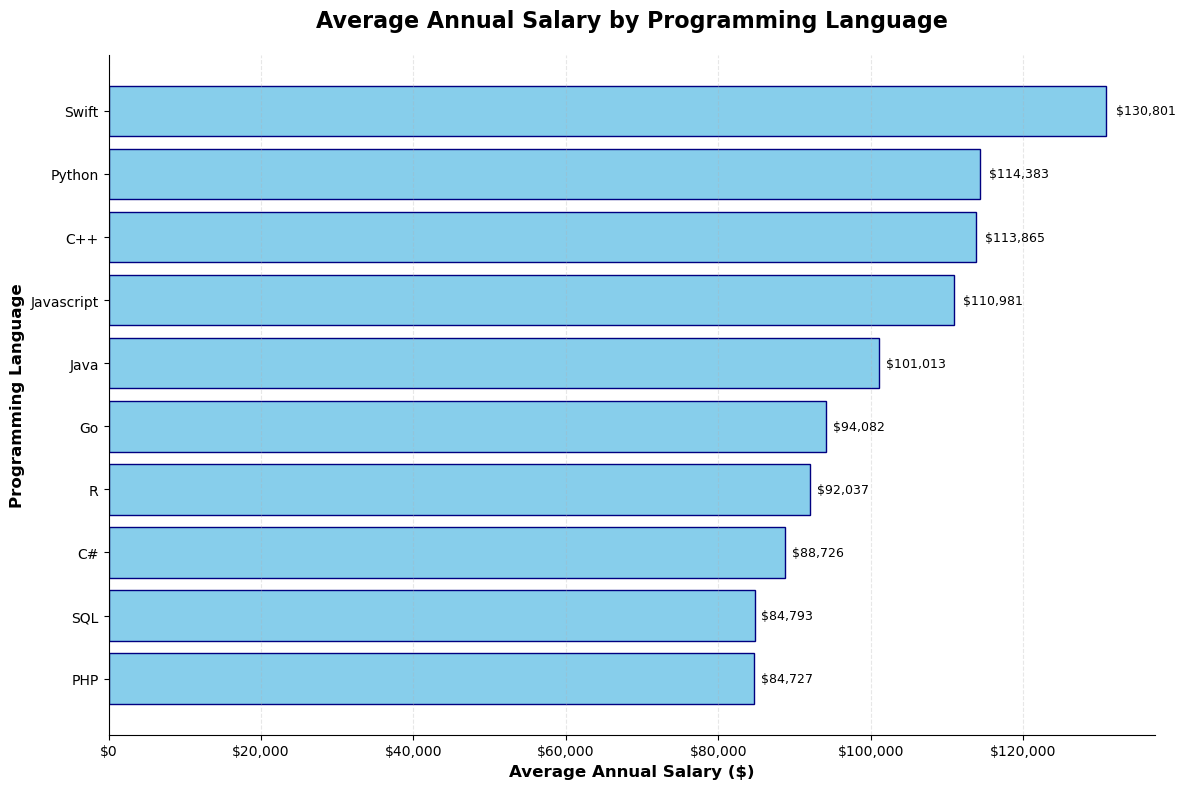


Sorted Data:
      Language  AverageAnnualSalary
8          PHP                84727
9          SQL                84793
7           C#                88726
3            R                92037
10          Go                94082
2         Java               101013
4   Javascript               110981
6          C++               113865
1       Python               114383
5        Swift               130801


In [6]:
import matplotlib.pyplot as plt
import pandas as pd

language_data = []
salary = []

for row in table.find_all('tr'):
    cells = row.find_all(['td', 'th'])
    if len(cells) >= 4:
        col1 = cells[1].text.strip()
        col2 = cells[3].text.strip()
        language_data.append(col1)
        salary.append(col2)
        print(col1, "|", col2)

df = pd.DataFrame({
    'Language': language_data,
    'AverageAnnualSalary': salary
})
df = df.drop(index=0)
df['AverageAnnualSalary'] = df['AverageAnnualSalary'].str.replace('$', '', regex=False).str.replace(',', '').astype(int)
df_sorted = df.sort_values(by='AverageAnnualSalary', ascending=True)  # Changed to ascending for horizontal bars

# Create the horizontal bar plot
plt.figure(figsize=(12, 8))
bars = plt.barh(df_sorted['Language'], df_sorted['AverageAnnualSalary'], color='skyblue', edgecolor='navy')

plt.title('Average Annual Salary by Programming Language', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Average Annual Salary ($)', fontsize=12, fontweight='bold')  # Swapped axes
plt.ylabel('Programming Language', fontsize=12, fontweight='bold')       # Swapped axes

# Remove xticks rotation (not needed for horizontal)
plt.yticks(fontsize=10)  # Changed from xticks to yticks

# Add value labels on bars - CORRECTED for horizontal
for i, (bar, salary_val) in enumerate(zip(bars, df_sorted['AverageAnnualSalary'])):
    plt.text(bar.get_width() + (bar.get_width() * 0.01),  # x position (salary value)
             bar.get_y() + bar.get_height()/2,            # y position (center of bar)
             f'${salary_val:,}', 
             ha='left', va='center', fontsize=9)          # Changed alignment

plt.grid(axis='x', alpha=0.3, linestyle='--')  # Changed to x-axis grid
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Format x-axis to show dollar signs and commas
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.tight_layout()
plt.show()

# Display the sorted dataframe
print("\nSorted Data:")
print(df_sorted)

Save the scrapped data into a file named *popular-languages.csv*


In [7]:
# your code goes here
import csv

with open('popular-languages.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Language', 'Average Annual Salary'])  # Write headers
    
    # Extract and write data - SKIP header rows
    for row in soup.find('table').find_all('tr'):
        cols = row.find_all('td')  # Only look for data cells, not header cells
        if len(cols) > 3:
            writer.writerow([cols[1].text.strip(), cols[3].text.strip()])

print("Data saved to popular-languages.csv!")

Data saved to popular-languages.csv!


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-17  | 0.1  | Ramesh Sannareddy  |  Created initial version of the lab |


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01).
